In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_csv('train_kOBLwZA.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df.drop(axis=1,columns=['Item_Identifier','Outlet_Identifier'],inplace = True)
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.isnull().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [5]:
df.describe()
#here min visiblity is 0 which does not make sense
#conisdering it still minimum lets replace that with 10 percentile

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
df['Item_Visibility'].replace(to_replace=0, value= df['Item_Visibility'].quantile(q=.10),inplace = True)

In [7]:
df.describe() #hence min is replaced

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066875,140.992782,1997.831867,2181.288914
std,4.643456,0.050719,62.275067,8.371760,1706.499616
min,4.555000,0.003575,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [8]:
df['Item_Fat_Content'].value_counts()
#LF ~ Low Fat and reg ~ regular and low fat ~ Low Fat
#so replace them also

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [9]:
df['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg': 'Regular', 'low fat': 'Low Fat'},inplace = True)
df['Item_Fat_Content'].value_counts()
#Done

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [10]:
#lets handle null values now
#replacing missing weights with means
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace = True)
df.isnull().sum()

Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

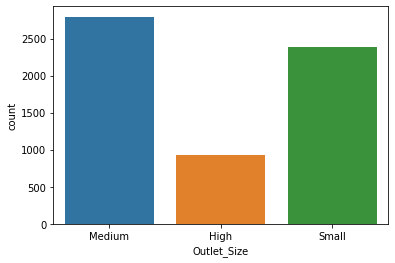

In [11]:
import seaborn as sns
sns.countplot(df['Outlet_Size'])

In [12]:
#lets replace NaN with Medium
df['Outlet_Size'].fillna(value='Medium',inplace = True)
df['Outlet_Size'].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [13]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.012042,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.012042,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [14]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066875,140.992782,1997.831867,2181.288914
std,4.226124,0.050719,62.275067,8.371760,1706.499616
min,4.555000,0.003575,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [15]:
df['Outlet_Establishment_Year']=(2013-df['Outlet_Establishment_Year'])
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,14,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,4,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,14,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.012042,Fruits and Vegetables,182.0950,15,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.012042,Household,53.8614,26,High,Tier 3,Supermarket Type1,994.7052


In [16]:
dummy = pd.get_dummies(df,columns=['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type'],drop_first=True)
df = dummy
df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,14,3735.1380,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,4,443.4228,1,0,0,0,0,...,0,1,0,1,0,0,1,0,1,0
2,17.50,0.016760,141.6180,14,2097.2700,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,19.20,0.012042,182.0950,15,732.3800,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,8.93,0.012042,53.8614,26,994.7052,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [17]:
#now all the preprocessing part is completed
#split data in X_train and y_train
X_train = df.drop(columns=['Item_Outlet_Sales']).values

In [18]:
X_train

array([[9.30000000e+00, 1.60473010e-02, 2.49809200e+02, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.92000000e+00, 1.92782160e-02, 4.82692000e+01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.75000000e+01, 1.67600750e-02, 1.41618000e+02, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.06000000e+01, 3.51862710e-02, 8.51224000e+01, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.21000000e+00, 1.45220646e-01, 1.03133200e+02, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.48000000e+01, 4.48782800e-02, 7.54670000e+01, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [19]:
y_train = df['Item_Outlet_Sales'].values
y_train

array([3735.138 ,  443.4228, 2097.27  , ..., 1193.1136, 1845.5976,
        765.67  ])

In [20]:
df_test = pd.read_csv('new_test.csv').values
df_test

array([[2.07500000e+01, 7.56483600e-03, 1.07862200e+02, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.30000000e+00, 3.84276770e-02, 8.73198000e+01, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.46000000e+01, 9.95749080e-02, 2.41753800e+02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.00000000e+01, 7.35285610e-02, 1.18744000e+02, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.53000000e+01, 1.13906540e-02, 2.14621800e+02, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.50000000e+00, 1.04720151e-01, 7.97960000e+01, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [21]:
#feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

In [22]:
X_train

array([[-0.84187169, -1.00220361,  1.74745381, ...,  0.72680189,
        -0.34955064, -0.35102831],
       [-1.64170589, -0.93849775, -1.48902325, ..., -1.37589075,
         2.86081583, -0.35102831],
       [ 1.09855449, -0.98814943,  0.01004021, ...,  0.72680189,
        -0.34955064, -0.35102831],
       ...,
       [-0.53424315, -0.62482921, -0.89720755, ...,  0.72680189,
        -0.34955064, -0.35102831],
       [-1.33644372,  1.54478375, -0.60797692, ..., -1.37589075,
         2.86081583, -0.35102831],
       [ 0.45963367, -0.43372612, -1.05226104, ...,  0.72680189,
        -0.34955064, -0.35102831]])

In [23]:
#splitting data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,Y_train,Y_test = train_test_split(X_train,y_train,test_size = 0.25)

In [24]:
Y_test

array([ 885.514 , 5880.3456, 2376.906 , ...,  998.7   , 3896.2616,
       2458.1336])

In [25]:
#now we have train and test data both
#so lets train model first
#lets use Linear Regression , Random forest and decision tree for this 
#for error we'll go with Mean Square
#importing Libraries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [26]:
#Linear Regression
L_reg = LinearRegression()
L_reg.fit(x_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
#testing error
print('mean squared error is: ',mean_squared_error(Y_test,L_reg.predict(x_test))**0.5)

mean squared error is:  1126.4518800597336


In [28]:
y_predict = L_reg.predict(x_test)

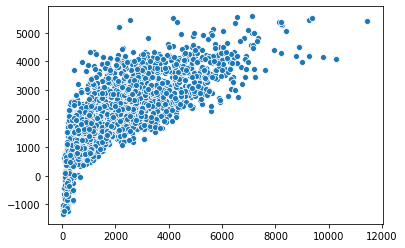

In [29]:
sns.scatterplot(Y_test,y_predict)

In [30]:
y_predict

array([ 805.69620858, 4328.70016782, 1981.55202026, ..., 1653.49767244,
       2880.60297808, 3047.97279217])

In [31]:
Y_test

array([ 885.514 , 5880.3456, 2376.906 , ...,  998.7   , 3896.2616,
       2458.1336])

In [32]:
#Decision Tree
DT_reg = DecisionTreeRegressor()
DT_reg.fit(x_train,Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [33]:
print('root mean squared error is: ',mean_squared_error(Y_test,DT_reg.predict(x_test))**0.5)

root mean squared error is:  1572.2083925939407


In [34]:
y_predict2 = DT_reg.predict(x_test)

In [35]:
y_predict2

array([ 605.878 , 5294.4416, 2410.8618, ..., 1998.7316, 1283.6624,
       3379.6008])

In [36]:
y_predict2 = pd.DataFrame(y_predict2)
y_predict2.head()

,0
0,605.8780
1,5294.4416
2,2410.8618
3,2444.8176
4,1657.8420


In [37]:
y_predict = pd.DataFrame(y_predict).head()
y_predict.head()

,0
0,805.696209
1,4328.700168
2,1981.552020
3,1733.060189
4,1886.928089


In [38]:
test_dataset = pd.read_csv('new_test.csv')
test_dataset.head()
X_testdata = test_dataset.values

In [39]:
X_testdata

array([[2.07500000e+01, 7.56483600e-03, 1.07862200e+02, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.30000000e+00, 3.84276770e-02, 8.73198000e+01, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.46000000e+01, 9.95749080e-02, 2.41753800e+02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.00000000e+01, 7.35285610e-02, 1.18744000e+02, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.53000000e+01, 1.13906540e-02, 2.14621800e+02, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.50000000e+00, 1.04720151e-01, 7.97960000e+01, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [40]:
y_sample1 = L_reg.predict(X_testdata)

In [41]:
y_sample2 = DT_reg.predict(X_testdata)

In [42]:
y_sample1 = pd.DataFrame(y_sample1)
y_sample1.columns = ['Item_Outlet_Sales']
y_sample1.head()

,Item_Outlet_Sales
0,100200.061874
1,83355.257640
2,226630.438372
3,147959.094925
4,215907.986020


In [43]:
y_sample2 = pd.DataFrame(y_sample2)
y_sample2.columns = ['Item_Outlet_Sales']
y_sample2.head()

,Item_Outlet_Sales
0,3436.1938
1,3436.1938
2,4745.8224
3,3436.1938
4,4745.8224


In [44]:
df_sample = pd.read_csv('Submit.csv')
df_sample.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,NaN
1,FDW14,OUT017,NaN
2,NCN55,OUT010,NaN
3,FDQ58,OUT017,NaN
4,FDY38,OUT027,NaN


In [45]:
df_sample['Item_Outlet_Sales'] = y_sample1['Item_Outlet_Sales']

In [47]:
df_sample.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,100200.061874
1,FDW14,OUT017,83355.257640
2,NCN55,OUT010,226630.438372
3,FDQ58,OUT017,147959.094925
4,FDY38,OUT027,215907.986020


In [48]:
df_sample.to_csv('sample1.csv',index=False)

In [49]:
df_sample['Item_Outlet_Sales'] = y_sample2['Item_Outlet_Sales']
df_sample.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,3436.1938
1,FDW14,OUT017,3436.1938
2,NCN55,OUT010,4745.8224
3,FDQ58,OUT017,3436.1938
4,FDY38,OUT027,4745.8224


In [50]:
df_sample.to_csv('sample2.csv',index=False)